In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# df = pd.read_csv("./patent.tsv", sep="\t", nrows = 500 )
application_cleaned_patented = pd.read_csv("csv_output/application_cleaned_patented.csv")

C:\Users\gongl\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6,7,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
application_cleaned_patented.head()

,Unnamed: 0,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
0,3,2045760,1948-08-23,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1986-04-25,FILE REPOSITORY (FRANCONIA),1986-08-11,NaN,NaN,2480888,1949-09-06,BOX STAYING MACHINE,UNDISCOUNTED
1,4,2048602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1984-03-22,FILE REPOSITORY (FRANCONIA),2018-11-06,NaN,NaN,RE19792,1935-12-17,NaN,UNDISCOUNTED
2,7,2107244,1936-10-23,Utility,"GREGORY, BERNARR E",3662,380,026000,NaN,Patented Case,2000-09-20,FILE REPOSITORY (FRANCONIA),2018-06-23,NaN,NaN,6130946,2000-10-10,NaN,UNDISCOUNTED
3,8,2122612,1937-01-27,NaN,NaN,NaN,000,000000,NaN,Patented File - (Old Case Added for File Track...,1992-10-13,FILE REPOSITORY (FRANCONIA),1993-03-16,NaN,NaN,2107431,1938-02-08,ANTISKID CROSS CHAINS,UNDISCOUNTED
4,9,2122769,1949-10-21,NaN,NaN,NaN,NaN,NaN,NaN,Patented File - (Old Case Added for File Track...,1987-11-04,FILE REPOSITORY (FRANCONIA),1988-05-03,NaN,NaN,2708722,1955-01-13,NaN,UNDISCOUNTED


In [5]:
# For testing purpose, to verify steps below are correct. Do not delete this key step. 
usa_ufo_df = application_cleaned_patented.loc[application_cleaned_patented["patent_number"] == "RE45254", :]
usa_ufo_df

,Unnamed: 0,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,appl_status_date,file_location,file_location_date,earliest_pgpub_number,earliest_pgpub_date,patent_number,patent_issue_date,invention_title,small_entity_indicator
3150176,6857192,13907761,2013-05-31,Re-Issue,"POWERS, WILLIAM S",2434,726,015000,19487.96.1.1.1,Patented Case,2014-10-29,ELECTRONIC,NaN,NaN,NaN,RE45254,2014-11-18,IMPLICIT POPULATION OF ACCESS CONTROL LISTS,UNDISCOUNTED


In [6]:
patent_claims_stats_df = pd.read_csv("csv_claim_2014/patent_claims_stats.csv")

C:\Users\gongl\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
patent_claims_stats_df = patent_claims_stats_df.rename(columns={"pat_no": "patent_number"})
patent_claims_stats_df.tail(80)

,patent_number,claim_no,word_ct,char_ct,or_ct,sf_ct,cns_ct,ind_flg,appl_id
75930584,RE45252,40,397,2670,0,0,0,1,12904914.0
75930585,RE45252,18,294,1851,0,0,0,1,12904914.0
75930586,RE45252,43,26,167,0,0,0,0,12904914.0
75930587,RE45252,42,33,199,0,0,0,0,12904914.0
75930588,RE45252,32,33,199,0,0,0,0,12904914.0
...,...,...,...,...,...,...,...,...,...
75930659,RE45254,31,26,181,1,0,0,0,13907761.0
75930660,RE45254,30,65,408,2,0,0,0,13907761.0
75930661,RE45254,7,49,336,2,0,0,0,13907761.0
75930662,RE45254,22,201,1262,2,0,0,0,13907761.0


In [7]:
inner_merged_total = pd.merge(application_cleaned_patented, patent_claims_stats_df, on=["patent_number"])
inner_merged_total

,Unnamed: 0,application_number,filing_date,application_invention_type,examiner_full_name,examiner_art_unit,uspc_class,uspc_subclass,atty_docket_number,appl_status_desc,...,invention_title,small_entity_indicator,claim_no,word_ct,char_ct,or_ct,sf_ct,cns_ct,ind_flg,appl_id
0,4631,5010660,NaN,Re-Issue,NaN,2401,220,27100,NaN,Patented Case,...,NaN,UNDISCOUNTED,4,214,1364,0,0,0,1,5010660.0
1,4631,5010660,NaN,Re-Issue,NaN,2401,220,27100,NaN,Patented Case,...,NaN,UNDISCOUNTED,2,43,250,0,0,0,0,5010660.0
2,4631,5010660,NaN,Re-Issue,NaN,2401,220,27100,NaN,Patented Case,...,NaN,UNDISCOUNTED,5,24,145,0,0,0,0,5010660.0
3,4631,5010660,NaN,Re-Issue,NaN,2401,220,27100,NaN,Patented Case,...,NaN,UNDISCOUNTED,1,268,1873,0,0,0,1,5010660.0
4,4631,5010660,NaN,Re-Issue,NaN,2401,220,27100,NaN,Patented Case,...,NaN,UNDISCOUNTED,3,46,298,0,0,0,0,5010660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368339,9686450,29409384,2011-12-22,Re-Issue,"HYDER, PHILIP S",2917.0,D15,199000,15491-000017/US/RE,Patented Case,...,VACUUM TRANSFER ROBOT,UNDISCOUNTED,1,12,74,0,0,0,1,29409384.0
368340,9686456,29409392,2011-12-22,Re-Issue,"PALASIK, PATRICIA ANN",2915.0,D15,139000,15491-000018/US/RE,Patented Case,...,VACUUM TRANSFER ROBOT,UNDISCOUNTED,1,12,74,0,0,0,1,29409392.0
368341,9690661,29414353,2012-02-28,Re-Issue,"HYDER, PHILIP S",2917.0,D18,015000,"211,976",Patented Case,...,PRINTER STAMP,SMALL,1,11,66,0,0,0,1,29414353.0
368342,9691451,29415275,2012-03-08,Re-Issue,"HYDER, PHILIP S",2917.0,D09,540000,12375/12301,Patented Case,...,BOTTLE,UNDISCOUNTED,1,10,59,0,0,0,1,29415275.0


In [8]:
inner_merged_total.columns

Index(['Unnamed: 0', 'application_number', 'filing_date',
       'application_invention_type', 'examiner_full_name', 'examiner_art_unit',
       'uspc_class', 'uspc_subclass', 'atty_docket_number', 'appl_status_desc',
       'appl_status_date', 'file_location', 'file_location_date',
       'earliest_pgpub_number', 'earliest_pgpub_date', 'patent_number',
       'patent_issue_date', 'invention_title', 'small_entity_indicator',
       'claim_no', 'word_ct', 'char_ct', 'or_ct', 'sf_ct', 'cns_ct', 'ind_flg',
       'appl_id'],
      dtype='object')

In [9]:
inner_merged_total

patented_df = inner_merged_total.loc[inner_merged_total["appl_status_desc"] == "Patented Case", :]
patented_df = patented_df[['patent_number', 'uspc_class', 'appl_status_desc', 'claim_no', 'word_ct', 'char_ct']]
patented_df

,patent_number,uspc_class,appl_status_desc,claim_no,word_ct,char_ct
0,RE30349,220,Patented Case,4,214,1364
1,RE30349,220,Patented Case,2,43,250
2,RE30349,220,Patented Case,5,24,145
3,RE30349,220,Patented Case,1,268,1873
4,RE30349,220,Patented Case,3,46,298
...,...,...,...,...,...,...
368339,RE44567,D15,Patented Case,1,12,74
368340,RE43781,D15,Patented Case,1,12,74
368341,RE44752,D18,Patented Case,1,11,66
368342,RE45022,D09,Patented Case,1,10,59


In [10]:
patented_df.describe()

,claim_no,word_ct,char_ct
count,367770.000000,367770.000000,367770.000000
mean,24.957588,90.488838,577.360100
std,37.805273,265.324922,1740.693142
min,0.000000,0.000000,0.000000
25%,7.000000,23.000000,141.000000
50%,16.000000,36.000000,223.000000
75%,31.000000,76.000000,478.000000
max,7000.000000,15148.000000,91329.000000


In [11]:
p = patented_df.groupby(['patent_number'])
p_index = p.count().index.tolist()
type(p_index)
p.count()['claim_no']

patent_number
8899829.0     9
8907138.0     7
8914910.0    16
8918269.0    10
8922265.0     1
             ..
RE45249      33
RE45250      18
RE45251      37
RE45252      57
RE45254      33
Name: claim_no, Length: 14945, dtype: int64

In [12]:
p.count()

,uspc_class,appl_status_desc,claim_no,word_ct,char_ct
patent_number,,,,,
8899829.0,9,9,9,9,9
8907138.0,7,7,7,7,7
8914910.0,16,16,16,16,16
8918269.0,10,10,10,10,10
8922265.0,1,1,1,1,1
...,...,...,...,...,...
RE45249,33,33,33,33,33
RE45250,18,18,18,18,18
RE45251,37,37,37,37,37


In [13]:
p_word_ct = p.agg({"word_ct": "sum"})
p_word_ct.tail(5)

,word_ct
patent_number,
RE45249,1665
RE45250,1138
RE45251,2154
RE45252,4597
RE45254,2825


In [14]:
p_char_ct = p.agg({"char_ct": "sum"})
p_char_ct.tail(5)

,char_ct
patent_number,
RE45249,10245
RE45250,7417
RE45251,13356
RE45252,29228
RE45254,17752


In [15]:
claims_summary_df = pd.DataFrame({
    "claim_no": p.count()['claim_no'],
    "total_word_ct": p_word_ct['word_ct'],
    "total_char_ct": p_char_ct['char_ct']
})

claims_summary_df['claim_no'] = claims_summary_df['claim_no'].astype('str')
claims_summary_df




,claim_no,total_word_ct,total_char_ct
patent_number,,,
8899829.0,9,378,2469
8907138.0,7,167,1102
8914910.0,16,1450,8901
8918269.0,10,1790,11805
8922265.0,1,850,4503
...,...,...,...
RE45249,33,1665,10245
RE45250,18,1138,7417
RE45251,37,2154,13356


In [16]:
claims_summary_df.dtypes


claim_no         object
total_word_ct     int64
total_char_ct     int64
dtype: object

In [17]:
claims_summary_df['claim_no'] = claims_summary_df['claim_no'].astype('int64')

In [18]:
claims_summary_df['average_word_ct_eachclaim'] = claims_summary_df['total_word_ct'] / claims_summary_df['claim_no']
claims_summary_df['average_char_ct_eachclaim'] = claims_summary_df['total_char_ct'] / claims_summary_df['claim_no']
claims_summary_df['average_word_ct_eachclaim']= claims_summary_df['average_word_ct_eachclaim'].round(0).astype(int)
claims_summary_df['average_char_ct_eachclaim']= claims_summary_df['average_char_ct_eachclaim'].round(0).astype(int)
claims_summary_df

,claim_no,total_word_ct,total_char_ct,average_word_ct_eachclaim,average_char_ct_eachclaim
patent_number,,,,,
8899829.0,9,378,2469,42,274
8907138.0,7,167,1102,24,157
8914910.0,16,1450,8901,91,556
8918269.0,10,1790,11805,179,1180
8922265.0,1,850,4503,850,4503
...,...,...,...,...,...
RE45249,33,1665,10245,50,310
RE45250,18,1138,7417,63,412
RE45251,37,2154,13356,58,361


In [19]:
claims_summary_df['average_word_ct_eachclaim'].describe()

count    14945.000000
mean       135.302844
std        298.790267
min          0.000000
25%         49.000000
50%         70.000000
75%        114.000000
max       9244.000000
Name: average_word_ct_eachclaim, dtype: float64

In [20]:
claims_summary_df['average_char_ct_eachclaim'].describe()

count    14945.000000
mean       872.580796
std       1972.672801
min          0.000000
25%        309.000000
50%        444.000000
75%        726.000000
max      66801.000000
Name: average_char_ct_eachclaim, dtype: float64

In [21]:
claims_summary_df['claim_no'].describe()

count    14945.000000
mean        24.608230
std         24.231829
min          1.000000
25%         10.000000
50%         19.000000
75%         31.000000
max        391.000000
Name: claim_no, dtype: float64

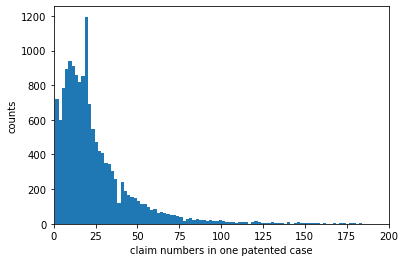

In [22]:
plt.hist(claims_summary_df['claim_no'], bins=200)
plt.xlabel('claim numbers in one patented case')
plt.ylabel('counts')
plt.xlim(0,200)
plt.savefig(f"patent_claims_stats_1")
plt.show()

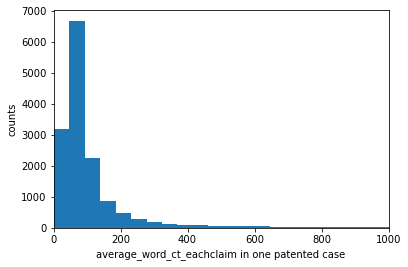

In [23]:
plt.hist(claims_summary_df['average_word_ct_eachclaim'], bins=200)
plt.xlabel('average_word_ct_eachclaim in one patented case')
plt.ylabel('counts')
plt.xlim(0,1000)
plt.savefig(f"patent_claims_stats_2")
plt.show()

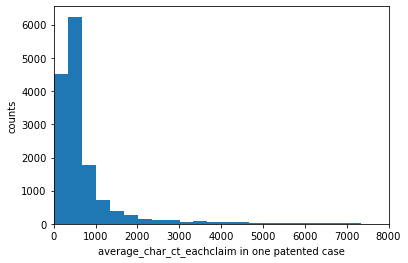

In [24]:
plt.hist(claims_summary_df['average_char_ct_eachclaim'], bins=200)
plt.xlabel('average_char_ct_eachclaim in one patented case')
plt.ylabel('counts')
plt.xlim(0,8000)
plt.savefig(f"patent_claims_stats_3")
plt.show()

In [25]:
# For testing purpose, to verify steps above are correct. Do not delete this key step. 
usa_ufo_df_1 = patented_df.loc[patented_df["patent_number"] == "RE45254", :]
usa_ufo_df_1.sort_values(["claim_no"], ascending = False).head(50)

,patent_number,uspc_class,appl_status_desc,claim_no,word_ct,char_ct
360990,RE45254,726,Patented Case,33,65,409
360978,RE45254,726,Patented Case,32,76,475
361005,RE45254,726,Patented Case,31,26,181
361006,RE45254,726,Patented Case,30,65,408
360980,RE45254,726,Patented Case,29,76,475
360988,RE45254,726,Patented Case,28,26,180
361002,RE45254,726,Patented Case,27,65,408
360982,RE45254,726,Patented Case,26,76,475
360979,RE45254,726,Patented Case,25,26,180
360994,RE45254,726,Patented Case,24,42,248


In [26]:
# For testing purpose, to verify steps above are correct. Do not delete this key step. 
usa_ufo_df_1.to_csv("csv_output/usa_ufo_df_1.csv")